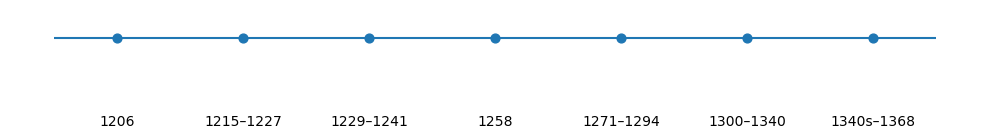

In [1]:
import matplotlib.pyplot as plt

# Labels you gave
labels = [
    "1206",
    "1215–1227",
    "1229–1241",
    "1258",
    "1271–1294",
    "1300–1340",
    "1340s–1368"
]

# x positions for the points
x = list(range(len(labels)))
y = [0] * len(labels)

plt.figure(figsize=(10, 3))

# Horizontal line
plt.hlines(0, x[0] - 0.5, x[-1] + 0.5)

# Points
plt.scatter(x, y, s=40)

# Labels (you can move them around as you like)
for xi, label in zip(x, labels):
    plt.text(xi, -0.15, label, ha='center', va='top', fontsize=10)

# Clean up axes
plt.axis('off')

plt.tight_layout()
plt.savefig("timeline.png", dpi=200)
plt.show()


/var/folders/6_/fj6w744s28s29ssc2p8cfn4w0000gn/T/ipykernel_98957/2311994073.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


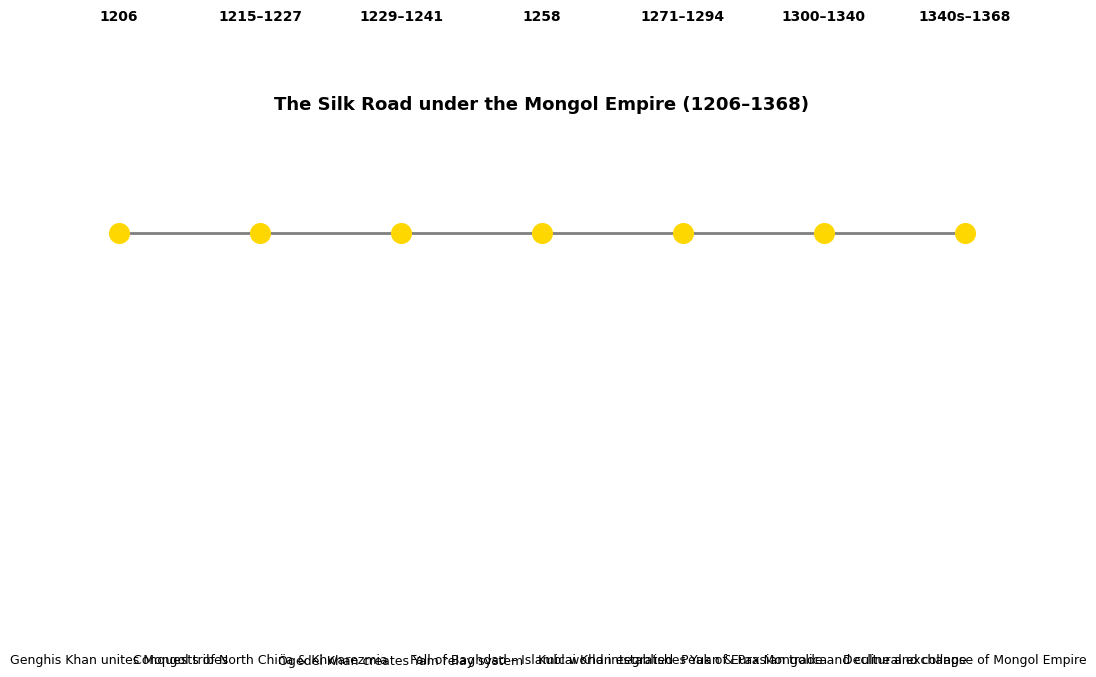

In [1]:
import matplotlib.pyplot as plt

# Timeline data
years = [
    "1206", "1215–1227", "1229–1241",
    "1258", "1271–1294", "1300–1340", "1340s–1368"
]
events = [
    "Genghis Khan unites Mongol tribes",
    "Conquests of North China & Khwarezmia",
    "Ögedei Khan creates Yam relay system",
    "Fall of Baghdad – Islamic world integrated",
    "Kublai Khan establishes Yuan & Pax Mongolica",
    "Peak of Eurasian trade and cultural exchange",
    "Decline and collapse of Mongol Empire"
]

# Plot setup
plt.figure(figsize=(12, 3))
plt.hlines(1, 0, len(years)-1, color='grey', lw=2)
plt.scatter(range(len(years)), [1]*len(years), color='gold', s=200, zorder=3)

# Labels
for i, (year, event) in enumerate(zip(years, events)):
    plt.text(i, 1.1, year, ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i, 0.8, event, ha='center', va='top', wrap=True, fontsize=9)

plt.axis('off')
plt.title("The Silk Road under the Mongol Empire (1206–1368)", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()


In [2]:
import plotly.express as px
import pandas as pd

data = pd.DataFrame({
    "Year": ["1206", "1215–1227", "1229–1241", "1258", "1271–1294", "1300–1340", "1340s–1368"],
    "Event": [
        "Genghis Khan unites Mongol tribes",
        "Conquests of North China & Khwarezmia",
        "Ögedei Khan creates Yam relay system",
        "Fall of Baghdad – Islamic world integrated",
        "Kublai Khan establishes Yuan & Pax Mongolica",
        "Peak of Eurasian trade and cultural exchange",
        "Decline and collapse of Mongol Empire"
    ]
})

fig = px.timeline(
    data, x_start="Year", x_end="Year", y=["Silk Road Timeline"]*len(data),
    text="Event", color_discrete_sequence=["#D4AF37"]
)
fig.update_yaxes(visible=False)
fig.update_layout(
    title="The Silk Road under the Mongol Empire (1206–1368)",
    showlegend=False, height=350, plot_bgcolor="white"
)
fig.show()


ModuleNotFoundError: No module named 'plotly'

Saved to: mongol_era_horizontal_timeline_wrapped4.png


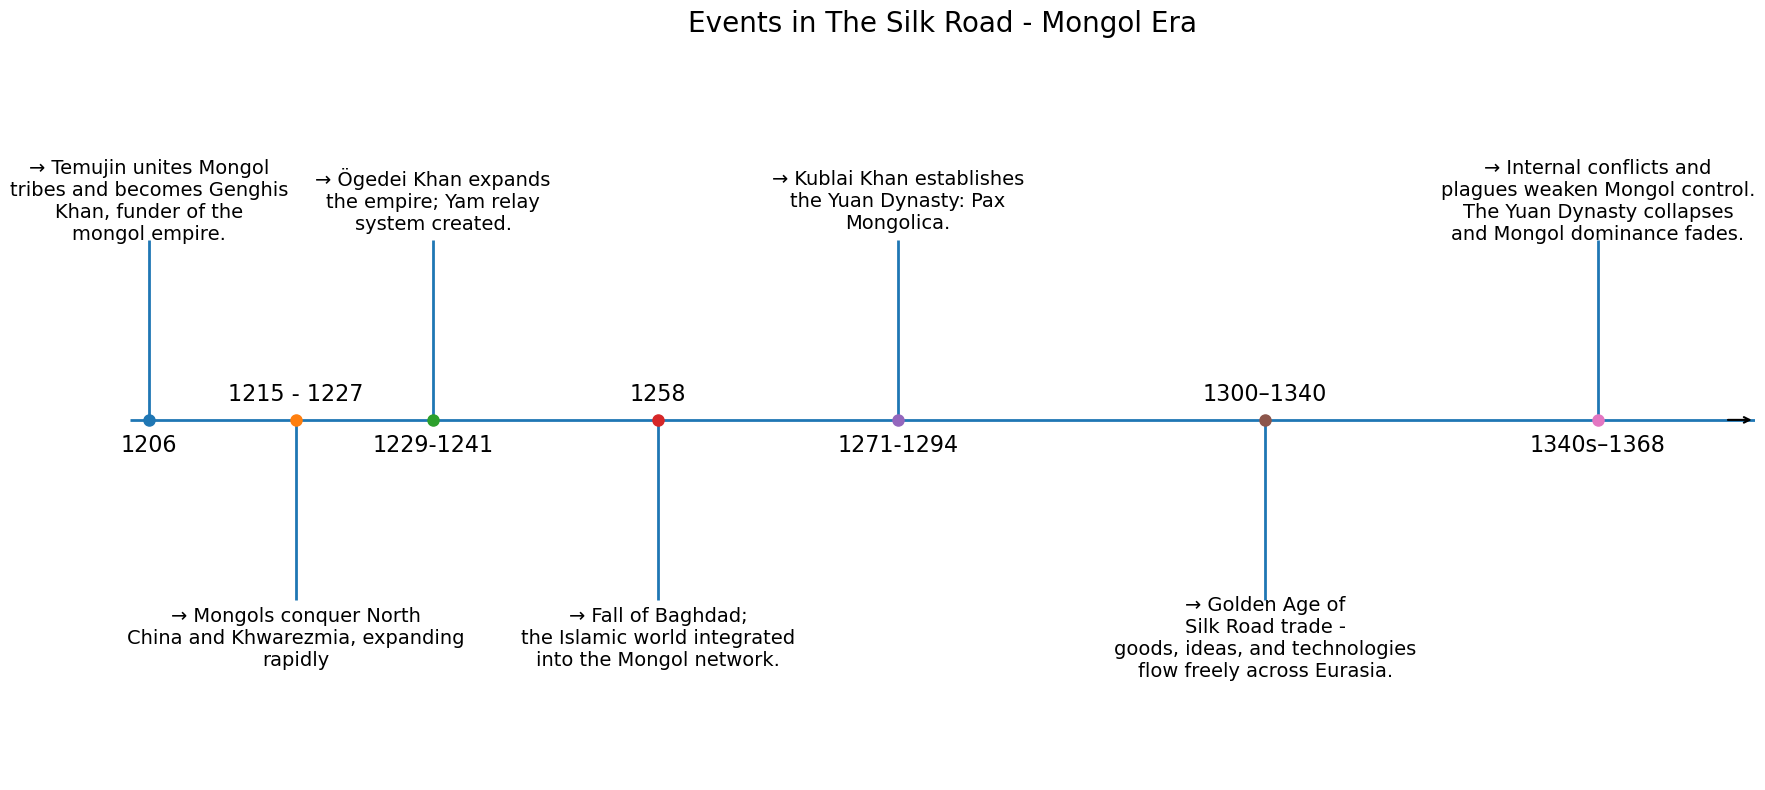

In [13]:
# Create a horizontal timeline image with alternating top/bottom text
import matplotlib.pyplot as plt

def wrap_words(text, max_words=4):
    """Wrap text to at most `max_words` per line (word-based wrapping)."""
    tokens = text.split()
    lines, line = [], []
    for tok in tokens:
        line.append(tok)
        if len(line) == max_words:
            lines.append(" ".join(line))
            line = []
    if line:
        lines.append(" ".join(line))
    return "\n".join(lines)

# Data — exactly your wording
events = [
    {
        "date": "1206",
        "year_value": 1206,
        "desc": "Temujin unites Mongol tribes and becomes Genghis Khan, funder of the mongol empire.",
    },
    {
        "date": "1215 - 1227",
        "year_value": (1215 + 1227) / 2,  # midpoint for spacing
        "desc": "Mongols conquer North China and Khwarezmia, expanding rapidly",
    },
    {
        "date": "1229-1241",
        "year_value": (1229 + 1241) / 2,
        "desc": ("Ögedei Khan expands the empire; Yam relay system created."),
    },
    {
        "date": "1258",
        "year_value": 1258,
        "desc": ("Fall of Baghdad; the Islamic world integrated into the Mongol network."),
    },
    {
        "date": "1271-1294",
        "year_value": (1271 + 1294) / 2,
        "desc": ("Kublai Khan establishes the Yuan Dynasty: Pax Mongolica."),
    },
    {
        "date": "1300–1340",
        "year_value": (1300 + 1340) / 2,
        "desc": "Golden Age of Silk Road trade - goods, ideas, and technologies flow freely across Eurasia.",
    },
    {
        "date": "1340s–1368",
        "year_value": (1340 + 1368) / 2,  # approximate start of the 1340s as 1340
        "desc": ("→ Internal conflicts and plagues weaken Mongol control. The Yuan Dynasty collapses and Mongol dominance fades."),
    },
]

# Convert multi-bullet descriptions into wrapped blocks (max 4 words per line)
for ev in events:
    parts = [p.strip() for p in ev["desc"].split("→") if p.strip()]
    rebuilt = []
    for p in parts:
        text = "→ " + p
        rebuilt.append(wrap_words(text, max_words=4))
    ev["desc_wrapped"] = "\n\n".join(rebuilt)  # blank line between bullets

# Alternating y positions (top, bottom, ...)
y_positions = [1, -1, 1, -1, 1, -1, 1]

fig, ax = plt.subplots(figsize=(18, 8))

xmin, xmax = 1204, 1370
ax.hlines(0, xmin, xmax, linewidth=2)

# Arrow at the end of the baseline
ax.annotate("", xy=(xmax, 0), xytext=(xmax - 3, 0),
            arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Draw stems, markers, dates, and wrapped descriptions
for (ev, y) in zip(events, y_positions):
    x = ev["year_value"]
    ax.vlines(x, 0, 0.7 * y, linewidth=2)           # stem
    ax.plot(x, 0, "o", markersize=8)                # marker
    ax.text(x, -0.1 if y > 0 else 0.1, ev["date"],  # date near baseline
            ha="center", va="center", fontsize=16)
    ax.text(x, 0.85 * y, ev["desc_wrapped"],        # wrapped description
            ha="center", va="center", fontsize=14)

ax.set_title("Events in The Silk Road - Mongol Era", fontsize=20, pad=20)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(xmin, xmax)
ax.axis("off")

out_path = "mongol_era_horizontal_timeline_wrapped4.png"
plt.tight_layout()
plt.savefig(out_path, dpi=200, bbox_inches="tight")

print(f"Saved to: {out_path}")

ValueError: Unknown style: ' '

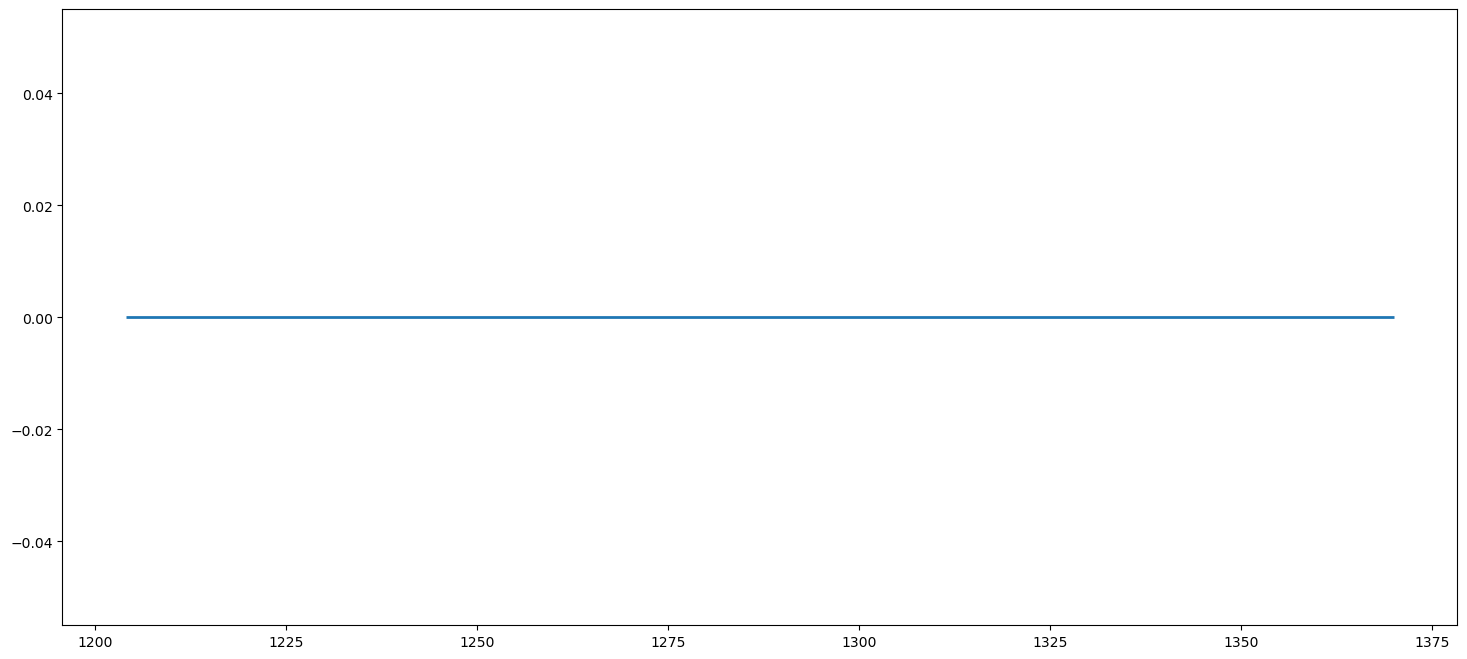

In [9]:
# Create a horizontal timeline image with alternating top/bottom text
import matplotlib.pyplot as plt

def wrap_words(text, max_words=4):
    """Wrap text to at most `max_words` per line (word-based wrapping)."""
    tokens = text.split()
    lines, line = [], []
    for tok in tokens:
        line.append(tok)
        if len(line) == max_words:
            lines.append(" ".join(line))
            line = []
    if line:
        lines.append(" ".join(line))
    return "\n".join(lines)

# Data — exactly your wording
events = [
    {
        "date": "1206",
        "year_value": 1206,
        "desc": "Temujin unites Mongol tribes and becomes Genghis Khan, funder of the mongol empire.",
    },
    {
        "date": "1215 - 1227",
        "year_value": (1215 + 1227) / 2,  # midpoint for spacing
        "desc": "Mongols conquer North China and Khwarezmia, expanding rapidly",
    },
    {
        "date": "1229-1241",
        "year_value": (1229 + 1241) / 2,
        "desc": ("Ögedei Khan expands the empire; Yam relay system created."),
    },
    {
        "date": "1258",
        "year_value": 1258,
        "desc": ("Fall of Baghdad; the Islamic world integrated into the Mongol network."),
    },
    {
        "date": "1271-1294",
        "year_value": (1271 + 1294) / 2,
        "desc": ("Kublai Khan establishes the Yuan Dynasty: Pax Mongolica."),
    },
    {
        "date": "1300–1340",
        "year_value": (1300 + 1340) / 2,
        "desc": "Golden Age of Silk Road trade - goods, ideas, and technologies flow freely across Eurasia.",
    },
    {
        "date": "1340s–1368",
        "year_value": (1340 + 1368) / 2,  # approximate start of the 1340s as 1340
        "desc": ("→ Internal conflicts and plagues weaken Mongol control. The Yuan Dynasty collapses and Mongol dominance fades."),
    },
]

# Convert multi-bullet descriptions into wrapped blocks (max 4 words per line)
for ev in events:
    parts = [p.strip() for p in ev["desc"].split(" ") if p.strip()]
    rebuilt = []
    for p in parts:
        text = "→ " + p
        rebuilt.append(wrap_words(text, max_words=4))
    ev["desc_wrapped"] = "\n\n".join(rebuilt)  # blank line between bullets

# Alternating y positions (top, bottom, ...)
y_positions = [1, -1, 1, -1, 1, -1, 1]

fig, ax = plt.subplots(figsize=(18, 8))

xmin, xmax = 1204, 1370
ax.hlines(0, xmin, xmax, linewidth=2)

# Arrow at the end of the baseline
ax.annotate("", xy=(xmax, 0), xytext=(xmax - 3, 0),
            arrowprops=dict(arrowstyle=" ", linewidth=1.5))

# Draw stems, markers, dates, and wrapped descriptions
for (ev, y) in zip(events, y_positions):
    x = ev["year_value"]
    ax.vlines(x, 0, 0.7 * y, linewidth=2)           # stem
    ax.plot(x, 0, "o", markersize=8)                # marker
    ax.text(x, -0.1 if y > 0 else 0.1, ev["date"],  # date near baseline
            ha="center", va="center", fontsize=12)
    ax.text(x, 0.85 * y, ev["desc_wrapped"],        # wrapped description
            ha="center", va="center", fontsize=11)

ax.set_title("Events in The Silk Road - Mongol Era (Horizontal Timeline)", fontsize=20, pad=20)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(xmin, xmax)
ax.axis("off")

out_path = "mongol_era_horizontal_timeline_wrapped4.png"
plt.tight_layout()
plt.savefig(out_path, dpi=200, bbox_inches="tight")

print(f"Saved to: {out_path}")

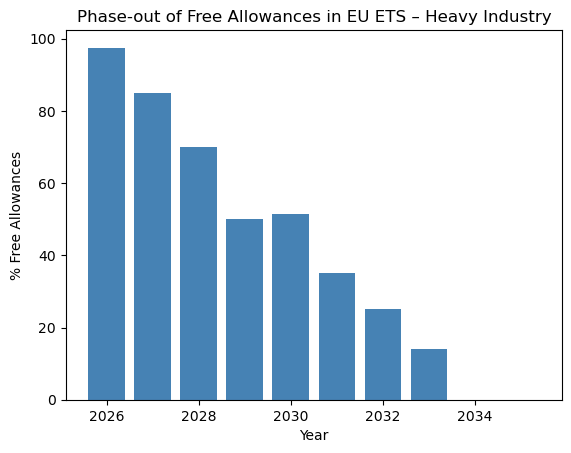

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Year': [2026,2027,2028,2029,2030,2031,2032,2033,2034,2035],
    '% Free Allowance': [97.5,85,70,50,51.5,35,25,14,0,0]
}

df = pd.DataFrame(data)
plt.bar(df['Year'], df['% Free Allowance'], color='steelblue')
plt.xlabel('Year')
plt.ylabel('% Free Allowances')
plt.title('Phase-out of Free Allowances in EU ETS – Heavy Industry')
plt.show()
